# بِسْمِ اللّٰهِ الرَّحْمٰنِ الرَّحِيْمِ

# 1. Load Data

In [97]:
pip install pandas

In [98]:
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [99]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [100]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/advan_nasa.csv', sep=';', encoding='UTF-8')
df

,Ulasan,Rating,Varian,L1,L2,L3,sentiment
0,pengiriman lama padahal udah pake yg instan baru sampe jam stengah 6,1,Hitam,n,n,n,negative
1,HP berfungsi dengan baik,5,Hijau,p,p,p,positive
2,barang sesuai deskripsi iklan,5,Biru,p,p,p,positive
3,terimakasih paket diterima dengan baik. karna utk hadiah jadi saya tidak bisa memeriksa atau membukanya.,5,Biru,p,p,p,positive
4,"Original 100%, packingan tebel dan aman",5,Biru,p,p,p,positive
...,...,...,...,...,...,...,...
114,barang sampai dan berfungsi dgn baik\nsemoga awet 💪\n\nini pembelian kedua saya bermerek Advan . semoga Advan ada yg ram3 dgn dapur pacu GG buat gaming dgn harga di bawah 1...,5,Hijau,p,p,p,positive
115,barang masih di segel \nadmin sangat amat ramah dan cepat merespon\ntidak nyesek beli di toko ini,5,Hijau,p,p,p,positive
116,recomen.. bagua banget . di bungkus buble tebal. ada free case bening. brg bagus kamera bagus,5,Biru,p,p,p,positive
117,"produk sesuai deskripsi, terimakasih Advan & Tokopedia.",5,Hijau,p,p,p,positive


# 2. Data Understanding

In [101]:
df = pd.DataFrame(df)
print(df.shape)

(119, 7)


In [102]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ulasan     116 non-null    object
 1   Rating     119 non-null    int64 
 2   Varian     119 non-null    object
 3   L1         119 non-null    object
 4   L2         119 non-null    object
 5   L3         119 non-null    object
 6   sentiment  119 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.6+ KB
None
(119, 7)


In [103]:
print(df.dtypes)

Ulasan       object
Rating        int64
Varian       object
L1           object
L2           object
L3           object
sentiment    object
dtype: object


In [104]:
df.describe()

,Rating
count,119.000000
mean,4.789916
std,0.687343
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


## Missing Value

In [105]:
# cek atribut yang memiliki missing value
print (df.isnull().sum())
print (df.shape)

Ulasan       3
Rating       0
Varian       0
L1           0
L2           0
L3           0
sentiment    0
dtype: int64
(119, 7)


In [106]:
# menghapus satu baris data(instance) yang memiliki missing value. Atribut "Ulasan" memiliki missing value yg rendah pada baris datanya sehingg tdk apa jika dihapus
df.dropna(subset=["Ulasan"], inplace=True)

print (df.isnull().sum())
print (df.shape)

Ulasan       0
Rating       0
Varian       0
L1           0
L2           0
L3           0
sentiment    0
dtype: int64
(116, 7)


# 2. Exploratory Data Analysis (EDA)

5    103
4      7
3      3
1      2
2      1
Name: Rating, dtype: int64

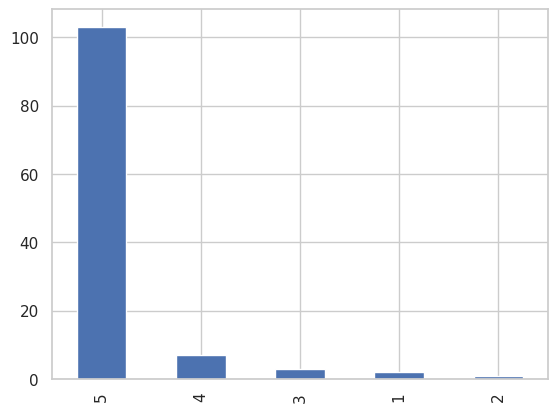

In [107]:
df['Rating'].value_counts().plot(kind='bar')
df['Rating'].value_counts()

Biru     45
Hitam    36
Hijau    35
Name: Varian, dtype: int64

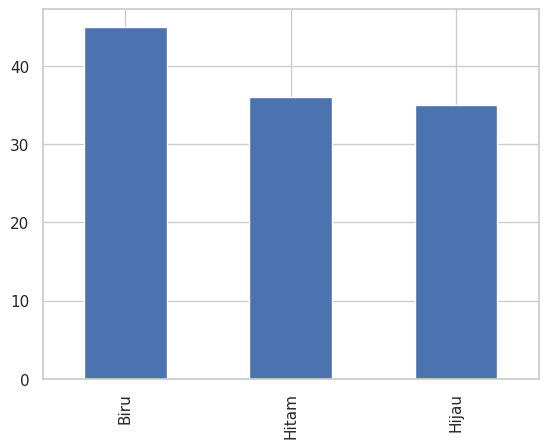

In [108]:
df['Varian'].value_counts().plot(kind='bar')
df['Varian'].value_counts()

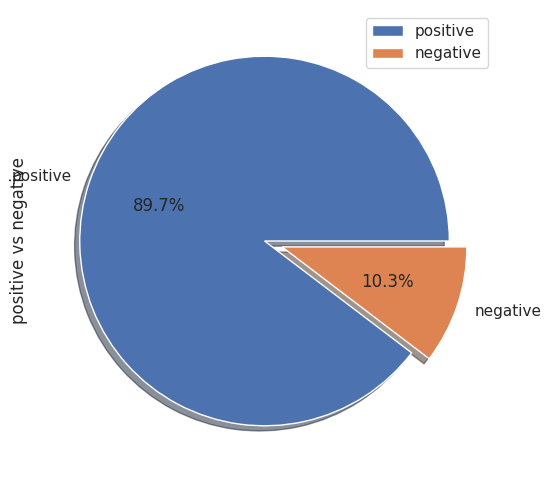

In [109]:
df["sentiment"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize =(6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("positive vs negative")
plt.legend(["positive", "negative"])
plt.show()

,positive,negative
Biru,41,3
Hijau,33,1
Hitam,29,6


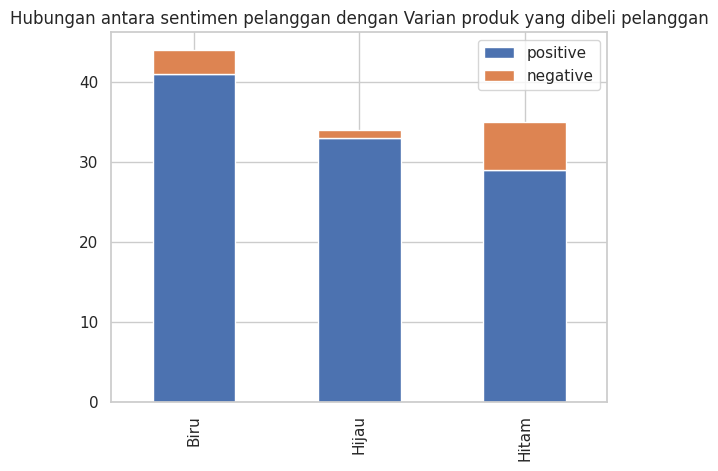

In [110]:
def review(variable):
    # Menghitung proporsi sentimen untuk setiap varian
    biru = (df[df['Varian']=='Biru'][variable].value_counts() / len(df[df['Varian']=='Biru'])).round(3) * len(df[df['Varian']=='Biru'])
    hijau = (df[df['Varian']=='Hijau'][variable].value_counts() / len(df[df['Varian']=='Hijau'])).round(3) * len(df[df['Varian']=='Hijau'])
    hitam = (df[df['Varian']=='Hitam'][variable].value_counts() / len(df[df['Varian']=='Hitam'])).round(3) * len(df[df['Varian']=='Hitam'])

    # Membuat dataframe
    dataset = pd.DataFrame([biru, hijau, hitam])
    dataset.index=['Biru','Hijau','Hitam']

    # Mengubah nilai float menjadi integer
    dataset = dataset.astype(int)

    # Menampilkan diagram stack bar
    dataset.plot(kind='bar', stacked=True, title='Hubungan antara sentimen pelanggan dengan Varian produk yang dibeli pelanggan')

    return dataset.head()

review('sentiment')

,5,4,3,2,1
Biru,34.0,2.0,0.0,0.0,NaN
Hijau,26.0,1.0,0.0,NaN,0.0
Hitam,27.0,1.0,0.0,NaN,0.0


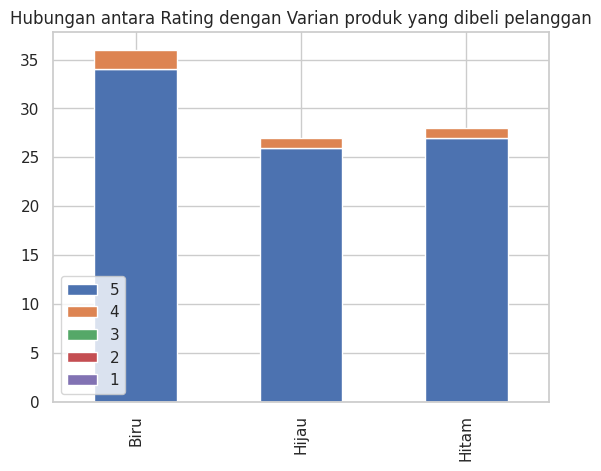

In [111]:
def review(variable):
    total_data = len(df)  # Total jumlah data asli

    biru = (df[df['Varian'] == 'Biru'][variable].value_counts() / total_data * 100).astype(int)
    hijau = (df[df['Varian'] == 'Hijau'][variable].value_counts() / total_data * 100).astype(int)
    hitam = (df[df['Varian'] == 'Hitam'][variable].value_counts() / total_data * 100).astype(int)

    dataset = pd.DataFrame([biru, hijau, hitam])
    dataset.index = ['Biru', 'Hijau', 'Hitam']

    dataset.plot(kind='bar', stacked=True, title='Hubungan antara Rating dengan Varian produk yang dibeli pelanggan')

    return dataset.head()

review('Rating')

,Biru,Hijau,Hitam
Positive,42,33,29
Negative,3,1,6


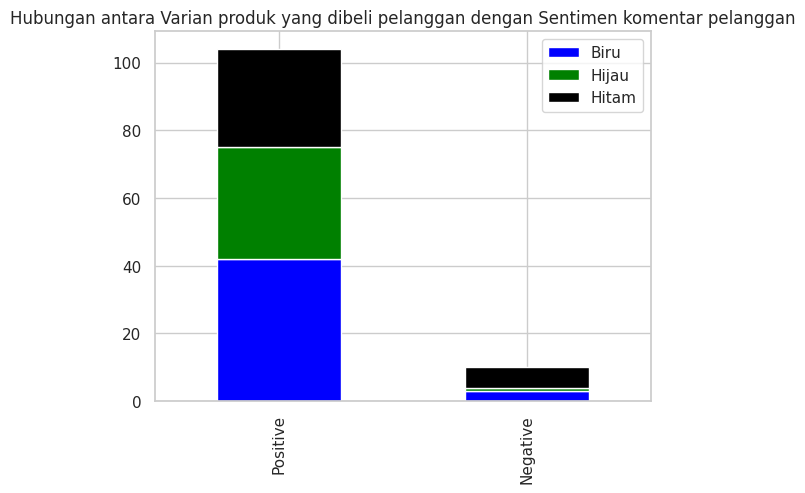

In [112]:
def review(variable):
  total_data = len(df)  # Jumlah total data asli
  positive = (df[df['sentiment']=='positive'][variable].value_counts() / total_data).round(4) * total_data
  negative = (df[df['sentiment']=='negative'][variable].value_counts() / total_data).round(4) * total_data
  dataset = pd.DataFrame([positive, negative])
  dataset.index=['Positive','Negative']
  dataset = dataset.astype(int)  # Mengubah tipe data menjadi integer
  dataset.plot(kind='bar', color=['blue', 'green', 'black'], stacked=True, title='Hubungan antara Varian produk yang dibeli pelanggan dengan Sentimen komentar pelanggan')
  return dataset.head()

review('Varian')

# 3. Data Preprocessing

## Wordcloud Awal
Wordcloud adalah representasi visual dari kumpulan kata-kata di mana ukuran kata menunjukkan frekuensinya atau kepentingannya. Dalam wordcloud, kata-kata yang muncul lebih sering dalam teks mendapatkan ukuran yang lebih besar dan seringkali ditampilkan dalam berbagai warna atau layout yang menarik.

In [113]:
pip install wordcloud

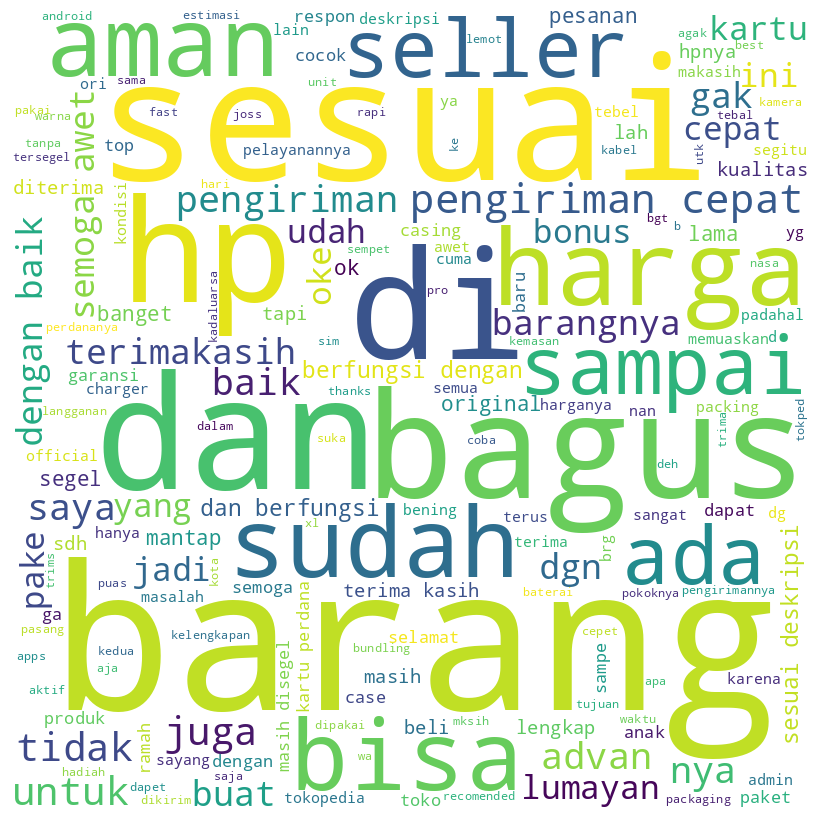

In [114]:
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Baca dataset awal
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/advan_nasa.csv', sep=';', encoding='UTF-8')

comment_words = ''
stopwords = set(STOPWORDS)


for val in df.Ulasan:


	val = str(val)


	tokens = val.split()


	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

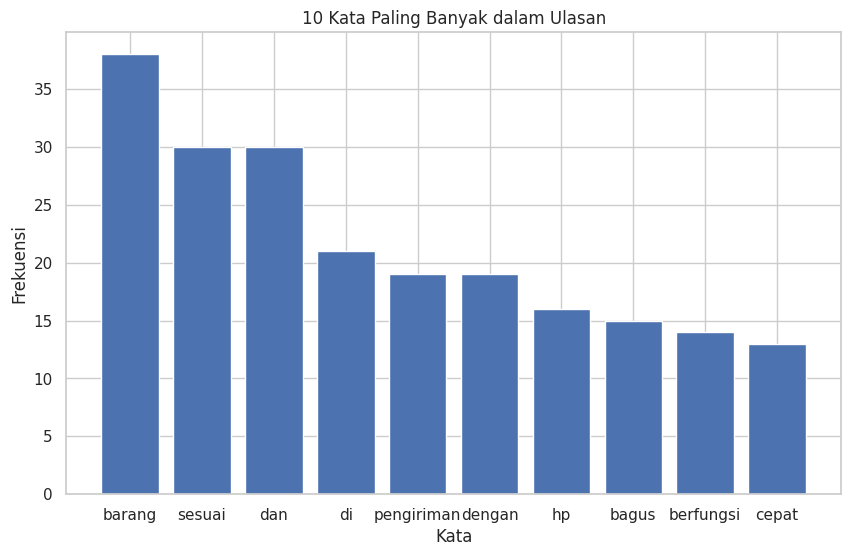

In [115]:
from collections import Counter
# Bar Chart
# Hitung frekuensi masing-masing kata
word_freq = Counter(comment_words.split())

# Ambil 10 kata teratas
top_words = word_freq.most_common(10)

# Pisahkan kata dan frekuensinya
words, freq = zip(*top_words)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, freq)
plt.title('10 Kata Paling Banyak dalam Ulasan')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

## Library untuk preprocessing text

In [116]:
pip install Sastrawi

In [117]:
# Library untuk preprocessing text
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

pd.set_option('max_colwidth',180)

## Metode Preproses
## A. Cleaning Data
- mengubah semua karakter huruf menjadi huruf kecil
- menghilangkan angka
- Menghilangkan emoticon
- menghilangkan Huruf Tunggal
- Menghapus tanda baca (punctuation)
- Mengganti kata slang bahasa Indonesia


In [118]:
def clean_text(text):
  # Menangani nilai float
    if isinstance(text, (float, np.float64)):
        return str(text)  # Mengubah float menjadi string
    # mengubah semua karakter huruf menjadi huruf keciLl
    text = text.lower()
    # menghilangkan angka
    text = re.sub('\w*\d\w*', '',text)
    # Menghilangkan emoticon
    emoticon_pattern = re.compile(u'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', flags=re.UNICODE)
    text = emoticon_pattern.sub(r'', text)
    # menghilangkan Huruf Tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)

    return text

clean = lambda x: clean_text(x)

In [119]:
dfx = pd.DataFrame(df.Ulasan.apply(clean))
dfx.head(25)

,Ulasan
0,pengiriman lama padahal udah pake yg instan baru sampe jam stengah
1,hp berfungsi dengan baik
2,barang sesuai deskripsi iklan
3,terimakasih paket diterima dengan baik. karna utk hadiah jadi saya tidak bisa memeriksa atau membukanya.
4,"original %, packingan tebel dan aman"
5,"barangnya sudah sampai, layak untuk harga segitu. pengirimannya juga cepet. terimakasih advan, pokoknya puas"
6,barang sesuai deskripsi. recommended
7,"barang sudah di terima msih segel wraping tebel kartu garansi lengkap semua, best pokona mh"
8,"kualitas barang sesuai dengan harganya. lama di perusahaan pengiriman,.mending selller ganti ekspedisinya aja"
9,"pengiriman cepat, barang nya juga bagus, berfungsi dengan baik"


Catatan: karena yang akan di praproses adalah kolom Ulasan yang berisi text, maka kita buat dataframe baru yaitu dfx yang khusus berisi ulasan yang akan kita praproses saja.

In [120]:
# Menghapus tanda baca (punctuation)
def Punctuation(string):
  punctuations = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''

  for x in string.lower():
    if x in punctuations:
      string = string.replace(x," ")
  return (string)

cleanPunc = lambda x : Punctuation(x)

dfx = pd.DataFrame(dfx.Ulasan.apply(cleanPunc))
dfx.head(25)

,Ulasan
0,pengiriman lama padahal udah pake yg instan baru sampe jam stengah
1,hp berfungsi dengan baik
2,barang sesuai deskripsi iklan
3,terimakasih paket diterima dengan baik karna utk hadiah jadi saya tidak bisa memeriksa atau membukanya
4,original packingan tebel dan aman
5,barangnya sudah sampai layak untuk harga segitu pengirimannya juga cepet terimakasih advan pokoknya puas
6,barang sesuai deskripsi recommended
7,barang sudah di terima msih segel wraping tebel kartu garansi lengkap semua best pokona mh
8,kualitas barang sesuai dengan harganya lama di perusahaan pengiriman mending selller ganti ekspedisinya aja
9,pengiriman cepat barang nya juga bagus berfungsi dengan baik


In [121]:
# Mengganti kata slang bahasa Indonesia

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Load the colloquial Indonesian lexicon
url = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
colloquial_lexicon = pd.read_csv(url)
new_entries = [
    {'slang': 'joss', 'formal': 'mantap'},
    {'slang': 'tq', 'formal': 'thank you'},
    {'slang': 'ok', 'formal': 'oke'},
    {'slang': 'msih', 'formal': 'masih'},
    {'slang': 'emag', 'formal': 'emang'},
    {'slang': 'thx', 'formal': 'thanks'},
    {'slang': 'kece', 'formal': 'keren'},
    {'slang': 'duit', 'formal': 'uang'},
    {'slang': 'batery', 'formal': 'baterai'},
    {'slang': 'stengah', 'formal': 'setengah'},
    {'slang': 'terimakasih', 'formal': 'terima kasih'},
    {'slang': 'pokona', 'formal': 'pokoknya'},
    {'slang': 'dh', 'formal': 'dah'},
    {'slang': 'tks', 'formal': 'thanks'},
    {'slang': 'brg', 'formal': 'barang'},
    {'slang': 'gercep', 'formal': 'gerak cepat'},
    {'slang': 'maniszz', 'formal': 'manis'},
    {'slang': 'mksih', 'formal': 'makasih'},
    {'slang': 'deakripsi', 'formal': 'deskripsi'},
    {'slang': 'lemotttt', 'formal': 'lemot'},
    {'slang': 'recomended', 'formal': 'recommended'},
    {'slang': 'moga', 'formal': 'semoga'},
    {'slang': 'pastik', 'formal': 'plastik'},
]
new_entry_df = pd.DataFrame(new_entries)
colloquial_lexicon = pd.concat([colloquial_lexicon, new_entry_df], ignore_index=True)

def remove_slang(text, lexicon):
    tokens = word_tokenize(text)
    result_tokens = []

    for token in tokens:
        # Check if the token is in the lexicon
        if token.lower() in lexicon['slang'].values:
            index_slang = lexicon['slang'] == token.lower()
            formal = list(set(lexicon.loc[index_slang, 'formal']))
            if len(formal) == 1:
                result_tokens.append(formal[0])
            else:
                result_tokens.append(token)  # Keep the original token if there's no clear formal equivalent
        else:
            result_tokens.append(token)

    result_text = ' '.join(result_tokens)
    return result_text


dfx['Ulasan'] = dfx['Ulasan'].apply(lambda x: remove_slang(x, colloquial_lexicon))
dfx.head(25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Ulasan
0,pengiriman lama padahal sudah pakai yang instan baru sampai jam setengah
1,hp berfungsi dengan baik
2,barang sesuai deskripsi iklan
3,terima kasih paket diterima dengan baik karena untuk hadiah jadi saya tidak bisa memeriksa atau membukanya
4,original packingan tebal dan aman
5,barangnya sudah sampai layak untuk harga segitu pengirimannya juga cepat terima kasih advan pokoknya puas
6,barang sesuai deskripsi recommended
7,barang sudah di terima masih segel wraping tebal kartu garansi lengkap semua best pokoknya mah
8,kualitas barang sesuai dengan harganya lama di perusahaan pengiriman mending selller ganti ekspedisinya saja
9,pengiriman cepat barang nya juga bagus berfungsi dengan baik


## B. Stopword Removal
Stopword Removal adalah proses menghapus kata-kata umum yang sering muncul dan tidak memberikan kontribusi signifikan terhadap pemahaman teks. Biasanya, stop words seperti "the", "is", "and", "in", dll., dihapus karena mereka tidak membawa banyak informasi untuk analisis teks. NLTK (Natural Language Toolkit) adalah salah satu pustaka yang umum digunakan untuk melakukan Stopword Removal dalam bahasa Python.

In [122]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords = open(stopwordsfile,'r')
  row = file_stopwords.readline()
  while row:
    word = row.strip()
    stopwords. append (word)
    row = file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [123]:
stop_words_indo = get_stopword('/content/drive/MyDrive/Colab Notebooks/data2/id.stopwords.02.01.2016.txt')

In [124]:
def stopwords(text):

  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered. append (w)

  hasil = ' '.join(filtered)
  return hasil

st = lambda x: stopwords(x)

In [125]:
import nltk
nltk.download('punkt')

dfx = pd.DataFrame(dfx.Ulasan.apply(st))
dfx.head(25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Ulasan
0,pengiriman pakai instan jam
1,hp berfungsi
2,barang sesuai deskripsi iklan
3,terima kasih paket diterima hadiah memeriksa membukanya
4,original packingan tebal aman
5,barangnya layak harga segitu pengirimannya cepat terima kasih advan pokoknya puas
6,barang sesuai deskripsi recommended
7,barang terima segel wraping tebal kartu garansi lengkap best pokoknya mah
8,kualitas barang sesuai harganya perusahaan pengiriman mending selller ganti ekspedisinya
9,pengiriman cepat barang nya bagus berfungsi


## C. Stemming
Stemming adalah proses menghilangkan afiks (akhiran atau awalan) dari kata sehingga hanya menyisakan bentuk dasar atau kata dasar. Ini membantu mengurangi variasi kata ke bentuk dasarnya dan meningkatkan konsistensi dalam analisis teks.

In [126]:
def stemming(text):

  factory_stem = StemmerFactory()
  stemmer = factory_stem.create_stemmer()
  text = stemmer.stem(text)
  return text

stem = lambda x: stemming(x)

dfx = pd.DataFrame(dfx.Ulasan.apply(stem))
dfx.head(25)

,Ulasan
0,kirim pakai instan jam
1,hp fungsi
2,barang sesuai deskripsi iklan
3,terima kasih paket terima hadiah periksa buka
4,original packingan tebal aman
5,barang layak harga segitu kirim cepat terima kasih advan pokok puas
6,barang sesuai deskripsi recommended
7,barang terima segel wraping tebal kartu garansi lengkap best pokok mah
8,kualitas barang sesuai harga usaha kirim mending selller ganti ekspedisi
9,kirim cepat barang nya bagus fungsi


## Wordcloud Akhir

In [127]:
dfx["sentiment"] = df["sentiment"]
dfx.head(15)

,Ulasan,sentiment
0,kirim pakai instan jam,negative
1,hp fungsi,positive
2,barang sesuai deskripsi iklan,positive
3,terima kasih paket terima hadiah periksa buka,positive
4,original packingan tebal aman,positive
5,barang layak harga segitu kirim cepat terima kasih advan pokok puas,positive
6,barang sesuai deskripsi recommended,positive
7,barang terima segel wraping tebal kartu garansi lengkap best pokok mah,positive
8,kualitas barang sesuai harga usaha kirim mending selller ganti ekspedisi,positive
9,kirim cepat barang nya bagus fungsi,positive


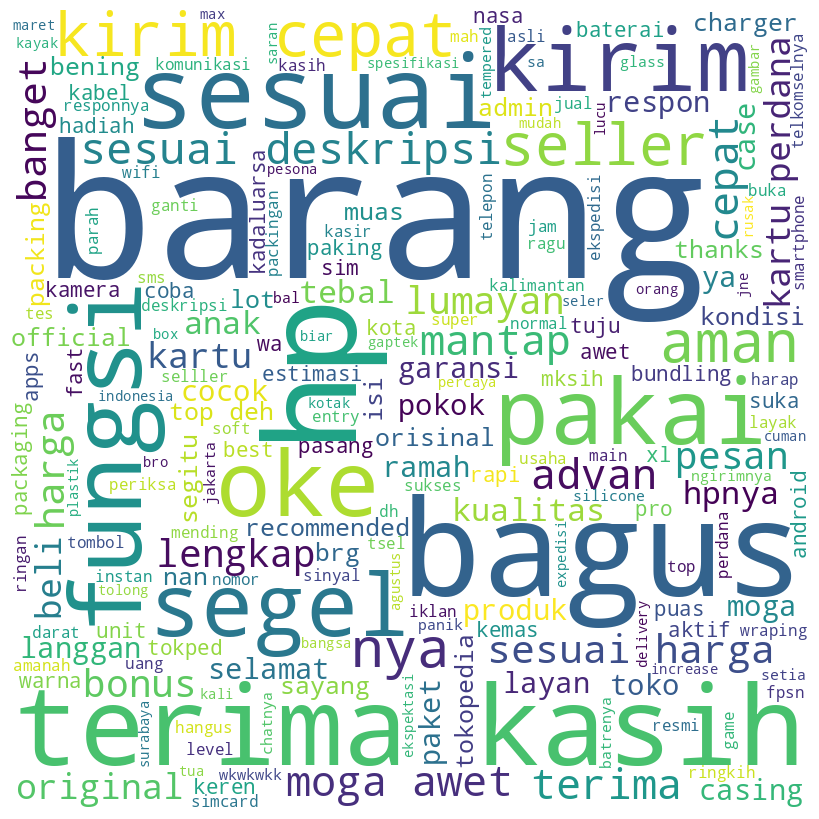

In [128]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in dfx.Ulasan:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10.).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Wordcloud Sentimen Positive

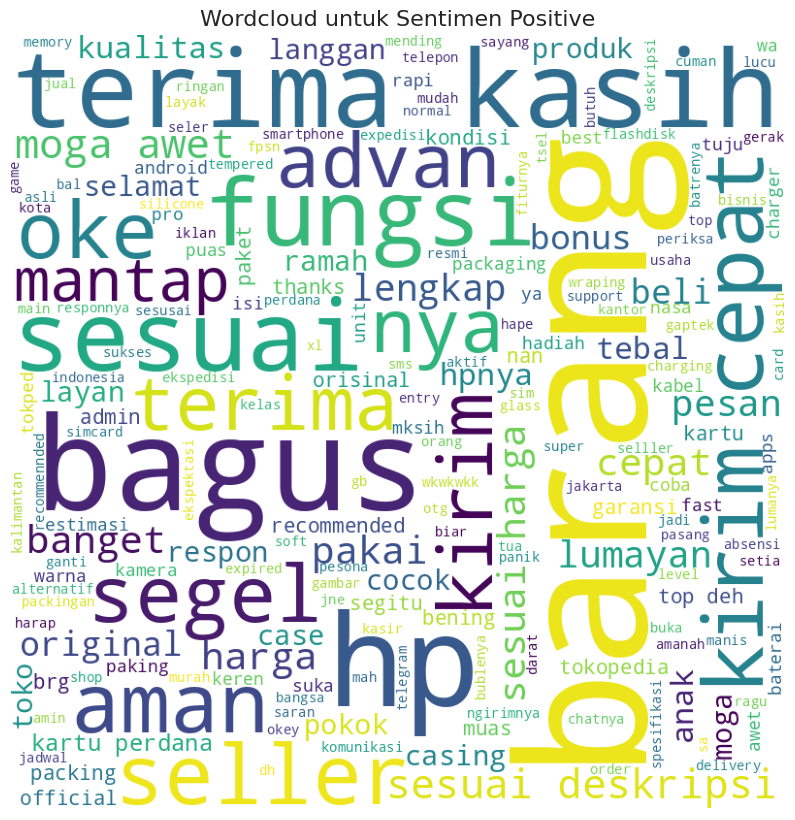

In [129]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Sentiment' is the column indicating sentiment
positive_reviews = dfx[dfx['sentiment'] == 'positive']

comment_words = ''
stopwords = set(STOPWORDS)

for val in positive_reviews['Ulasan']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10.).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud untuk Sentimen Positive", fontsize=16)
plt.tight_layout(pad=0)

plt.show()

## Wordcloud Sentimen Negative

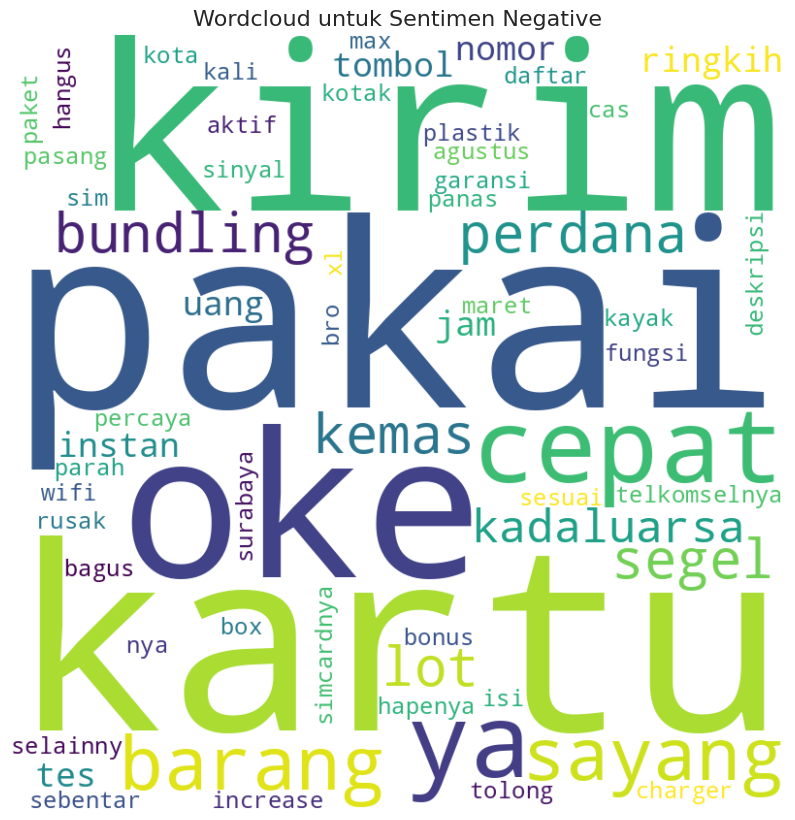

In [130]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Sentiment' is the column indicating sentiment
negative_reviews = dfx[dfx['sentiment'] == 'negative']

comment_words = ''
stopwords = set(STOPWORDS)

for val in negative_reviews['Ulasan']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10.).generate(comment_words)

# plot the WordCloud image with title
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud untuk Sentimen Negative", fontsize=16)
plt.tight_layout(pad=0)

plt.show()

#  4. Pembagian Dataset

## Library

In [131]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

## library untuk vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Library untuk evaluasi
from sklearn .metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## TF-IDF Vectorizer
Tf-idf adalah metode yang mencoba mengidentifikasi kata-kata yang paling sering muncul atau signifikan dalam sebuah dokumen.

In [132]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

# Target and Features
y = dfx.sentiment
X = dfx.Ulasan

# Pembagian dataset
test_sizes = [0.1, 0.2, 0.3]

## Random Under Sampler
Jika kelas mayoritas (misalnya, komentar positif yang lebih umum) sangat dominan, Random Under Sampler dapat membantu menciptakan keseimbangan sehingga model tidak menjadi terlalu memihak kepada kelas mayoritas. Karena hal tersebut dapat mengakibatkan kinerja model yang buruk pada kelas minoritas karena model kurang terlatih untuk mengenali pola dalam data tersebut.

In [133]:
from imblearn.under_sampling import RandomUnderSampler

## SMOTE


In [134]:
from imblearn.over_sampling import SMOTE

# 5. Klasifikasi dan Evaluasi Hasil Klasifikasi

## Algoritma 1 : Multinomial Naive Bayes (Random State = 21)

In [135]:
accuracies_nb = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply undersampling to the training data
    sampler = RandomUnderSampler(random_state=10)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

    # Convert the resampled data back to Series
    X_train_resampled = pd.Series(X_train_resampled.flatten())

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train_resampled)
    X_test_vect = vectorizer.transform(X_test)

    # Train and evaluate Naive Bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_vect, y_train_resampled)
    y_pred_nb = mnb.predict(X_test_vect)

    # Evaluate the model
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
    recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
    f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')
    accuracies_nb.append(accuracy_nb)

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_nb}')
    print(f'Confusion Matrix:\n{conf_matrix_nb}')
    print(f'Precision: {precision_nb}')
    print(f'Recall: {recall_nb}')

    # Generate a classification report
    class_report = classification_report(y_test, y_pred_nb)
    print('Classification Report:')
    print(class_report)

Skenario Test Size 0.1
Accuracy: 0.75
Confusion Matrix:
[[2 1]
 [2 7]]
Precision: 0.78125
Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.67      0.57         3
    positive       0.88      0.78      0.82         9

    accuracy                           0.75        12
   macro avg       0.69      0.72      0.70        12
weighted avg       0.78      0.75      0.76        12

Skenario Test Size 0.2
Accuracy: 0.7916666666666666
Confusion Matrix:
[[ 3  1]
 [ 4 16]]
Precision: 0.8557422969187676
Recall: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       0.43      0.75      0.55         4
    positive       0.94      0.80      0.86        20

    accuracy                           0.79        24
   macro avg       0.68      0.78      0.71        24
weighted avg       0.86      0.79      0.81        24

Skenario Test Size 0.3
Accuracy: 0.75
Confusion Mat

## Algoritma 1.5: MNB SMOTE 🗿

In [136]:
from sklearn.naive_bayes import MultinomialNB

for test_size in test_sizes:

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply oversampling to the training data using SMOTE
    smote = SMOTE()
    X_train_vect = vectorizer.fit_transform(X_train)
    X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)

    # Train and evaluate Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_resampled, y_resampled)

    # Vectorize the test data
    X_test_vect = vectorizer.transform(X_test)
    y_pred_nb = nb_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
    recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
    f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')

    # Print the confusion matrix and other metrics
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_nb}')
    print(f'Confusion Matrix:\n{conf_matrix_nb}')
    print(f'Precision: {precision_nb}')
    print(f'Recall: {recall_nb}')

    # Generate a classification report
    class_report_nb = classification_report(y_test, y_pred_nb)
    print('Classification Report:')
    print(class_report_nb)

Skenario Test Size 0.1
Accuracy: 0.9166666666666666
Confusion Matrix:
[[2 1]
 [0 9]]
Precision: 0.9249999999999999
Recall: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
    positive       0.90      1.00      0.95         9

    accuracy                           0.92        12
   macro avg       0.95      0.83      0.87        12
weighted avg       0.92      0.92      0.91        12

Skenario Test Size 0.2
Accuracy: 0.9166666666666666
Confusion Matrix:
[[ 2  2]
 [ 0 20]]
Precision: 0.9242424242424242
Recall: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.50      0.67         4
    positive       0.91      1.00      0.95        20

    accuracy                           0.92        24
   macro avg       0.95      0.75      0.81        24
weighted avg       0.92      0.92      0.90        24

Skenario Tes

## Algoritma 2 : Decision Tree (Random State = 21)

In [137]:
accuracies_dt = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply undersampling to the training data
    sampler = RandomUnderSampler(random_state=10)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

    # Convert the resampled data back to Series
    X_train_resampled = pd.Series(X_train_resampled.flatten())

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train_resampled)
    X_test_vect = vectorizer.transform(X_test)

    # Train and evaluate Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train_vect, y_train_resampled)
    y_pred_dt = dt_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
    f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')
    accuracies_dt.append(accuracy_dt)

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_dt}')
    print(f'Confusion Matrix:\n{conf_matrix_dt}')
    print(f'Precision: {precision_dt}')
    print(f'Recall: {recall_dt}')

    # Generate a classification report
    class_report = classification_report(y_test, y_pred_dt)
    print('Classification Report:')
    print(class_report)

Skenario Test Size 0.1
Accuracy: 0.5833333333333334
Confusion Matrix:
[[2 1]
 [4 5]]
Precision: 0.7083333333333334
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.67      0.44         3
    positive       0.83      0.56      0.67         9

    accuracy                           0.58        12
   macro avg       0.58      0.61      0.56        12
weighted avg       0.71      0.58      0.61        12

Skenario Test Size 0.2
Accuracy: 0.4583333333333333
Confusion Matrix:
[[ 4  0]
 [13  7]]
Precision: 0.8725490196078431
Recall: 0.4583333333333333
Classification Report:
              precision    recall  f1-score   support

    negative       0.24      1.00      0.38         4
    positive       1.00      0.35      0.52        20

    accuracy                           0.46        24
   macro avg       0.62      0.68      0.45        24
weighted avg       0.87      0.46      0.50        24

Skenario Tes

## Algoritma 2.5: Decision Tree (SMOTE)

In [138]:
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply oversampling to the training data using SMOTE
    smote = SMOTE()

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train)
    X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)

    # Train and evaluate Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_resampled, y_resampled)
    X_test_vect = vectorizer.transform(X_test)
    y_pred_dt = dt_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
    f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_dt}')
    print(f'Confusion Matrix:\n{conf_matrix_dt}')
    print(f'Precision: {precision_dt}')
    print(f'Recall: {recall_dt}')

    # Generate a classification report
    class_report = classification_report(y_test, y_pred_dt)
    print('Classification Report:')
    print(class_report)

Skenario Test Size 0.1
Accuracy: 0.8333333333333334
Confusion Matrix:
[[1 2]
 [0 9]]
Precision: 0.8636363636363636
Recall: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.33      0.50         3
    positive       0.82      1.00      0.90         9

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12

Skenario Test Size 0.2
Accuracy: 0.7916666666666666
Confusion Matrix:
[[ 2  2]
 [ 3 17]]
Precision: 0.812280701754386
Recall: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       0.40      0.50      0.44         4
    positive       0.89      0.85      0.87        20

    accuracy                           0.79        24
   macro avg       0.65      0.68      0.66        24
weighted avg       0.81      0.79      0.80        24

Skenario Test

## Algoritma 3 : KNN (Random State = 21)

In [139]:
accuracies_knn = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply undersampling to the training data
    sampler = RandomUnderSampler(random_state=10)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

    # Convert the resampled data back to Series
    X_train_resampled = pd.Series(X_train_resampled.flatten())

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train_resampled)
    X_test_vect = vectorizer.transform(X_test)

    # Train and evaluate KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_vect, y_train_resampled)
    y_pred_knn = knn_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')
    accuracies_knn.append(accuracy_knn)

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_knn}')
    print(f'Confusion Matrix:\n{conf_matrix_knn}')
    print(f'Precision: {precision_knn}')
    print(f'Recall: {recall_knn}')

    # Generate a classification report
    class_report = classification_report(y_test, y_pred_knn)
    print('Classification Report:')
    print(class_report)

Skenario Test Size 0.1
Accuracy: 0.5
Confusion Matrix:
[[3 0]
 [6 3]]
Precision: 0.8333333333333334
Recall: 0.5
Classification Report:
              precision    recall  f1-score   support

    negative       0.33      1.00      0.50         3
    positive       1.00      0.33      0.50         9

    accuracy                           0.50        12
   macro avg       0.67      0.67      0.50        12
weighted avg       0.83      0.50      0.50        12

Skenario Test Size 0.2
Accuracy: 0.8333333333333334
Confusion Matrix:
[[ 4  0]
 [ 4 16]]
Precision: 0.9166666666666666
Recall: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         4
    positive       1.00      0.80      0.89        20

    accuracy                           0.83        24
   macro avg       0.75      0.90      0.78        24
weighted avg       0.92      0.83      0.85        24

Skenario Test Size 0.3
Accuracy: 0.7222222

## Algoritma 3.5: KNN SMOTE

In [140]:
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply oversampling to the training data using SMOTE
    smote = SMOTE()

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train)
    X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)

    # Train and evaluate K-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_resampled, y_resampled)
    X_test_vect = vectorizer.transform(X_test)
    y_pred_knn = knn_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_knn}')
    print(f'Confusion Matrix:\n{conf_matrix_knn}')
    print(f'Precision: {precision_knn}')
    print(f'Recall: {recall_knn}')

    # Generate a classification report
    class_report_knn = classification_report(y_test, y_pred_knn)
    print('Classification Report:')
    print(class_report_knn)

Skenario Test Size 0.1
Accuracy: 0.5
Confusion Matrix:
[[2 1]
 [5 4]]
Precision: 0.6714285714285714
Recall: 0.5
Classification Report:
              precision    recall  f1-score   support

    negative       0.29      0.67      0.40         3
    positive       0.80      0.44      0.57         9

    accuracy                           0.50        12
   macro avg       0.54      0.56      0.49        12
weighted avg       0.67      0.50      0.53        12

Skenario Test Size 0.2
Accuracy: 0.5833333333333334
Confusion Matrix:
[[ 2  2]
 [ 8 12]]
Precision: 0.7476190476190476
Recall: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       0.20      0.50      0.29         4
    positive       0.86      0.60      0.71        20

    accuracy                           0.58        24
   macro avg       0.53      0.55      0.50        24
weighted avg       0.75      0.58      0.64        24

Skenario Test Size 0.3
Accuracy: 0.6111111

## Algoritma 4 : Random Forest (Random State = 21)

In [141]:
accuracies_rf = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply undersampling to the training data
    sampler = RandomUnderSampler(random_state=10)
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

    # Convert the resampled data back to Series
    X_train_resampled = pd.Series(X_train_resampled.flatten())

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train_resampled)
    X_test_vect = vectorizer.transform(X_test)

    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier(random_state=10)
    rf_model.fit(X_train_vect, y_train_resampled)
    y_pred_rf = rf_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')
    accuracies_rf.append(accuracy_rf)

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_rf}')
    print(f'Confusion Matrix:\n{conf_matrix_rf}')
    print(f'Precision: {precision_rf}')
    print(f'Recall: {recall_rf}')

    # Generate a classification report
    class_report = classification_report(y_test, y_pred_rf)
    print('Classification Report:')
    print(class_report)

Skenario Test Size 0.1
Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 1]
 [3 6]]
Precision: 0.7428571428571429
Recall: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       0.40      0.67      0.50         3
    positive       0.86      0.67      0.75         9

    accuracy                           0.67        12
   macro avg       0.63      0.67      0.62        12
weighted avg       0.74      0.67      0.69        12

Skenario Test Size 0.2
Accuracy: 0.875
Confusion Matrix:
[[ 3  1]
 [ 2 18]]
Precision: 0.8894736842105262
Recall: 0.875
Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.75      0.67         4
    positive       0.95      0.90      0.92        20

    accuracy                           0.88        24
   macro avg       0.77      0.82      0.79        24
weighted avg       0.89      0.88      0.88        24

Skenario Test Size 0.3
Accuracy: 0.555

## Algortima 4.5: Random Forest SMOTE

In [142]:
from sklearn.ensemble import RandomForestClassifier

for test_size in test_sizes:
    algorithms.append('Random Forest')
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)

    # Apply oversampling to the training data using SMOTE
    smote = SMOTE()

    # Vectorize the text data
    X_train_vect = vectorizer.fit_transform(X_train)
    X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)

    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_resampled, y_resampled)
    X_test_vect = vectorizer.transform(X_test)
    y_pred_rf = rf_model.predict(X_test_vect)

    # Evaluate the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')

    # Print the confusion matrix
    print(f'\033[1mSkenario Test Size {test_size}\033[0m')
    print(f'Accuracy: {accuracy_rf}')
    print(f'Confusion Matrix:\n{conf_matrix_rf}')
    print(f'Precision: {precision_rf}')
    print(f'Recall: {recall_rf}')

    # Generate a classification report
    class_report_rf = classification_report(y_test, y_pred_rf)
    print('Classification Report:')
    print(class_report_rf)

Skenario Test Size 0.1
Accuracy: 0.8333333333333334
Confusion Matrix:
[[1 2]
 [0 9]]
Precision: 0.8636363636363636
Recall: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.33      0.50         3
    positive       0.82      1.00      0.90         9

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12

Skenario Test Size 0.2
Accuracy: 0.875
Confusion Matrix:
[[ 1  3]
 [ 0 20]]
Precision: 0.8913043478260869
Recall: 0.875
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.25      0.40         4
    positive       0.87      1.00      0.93        20

    accuracy                           0.88        24
   macro avg       0.93      0.62      0.67        24
weighted avg       0.89      0.88      0.84        24

Skenario Test Size 0.3
Accuracy: 0.944

## Visualisasi Perbandingan Tiap Algoritma (Random Under Sampler)

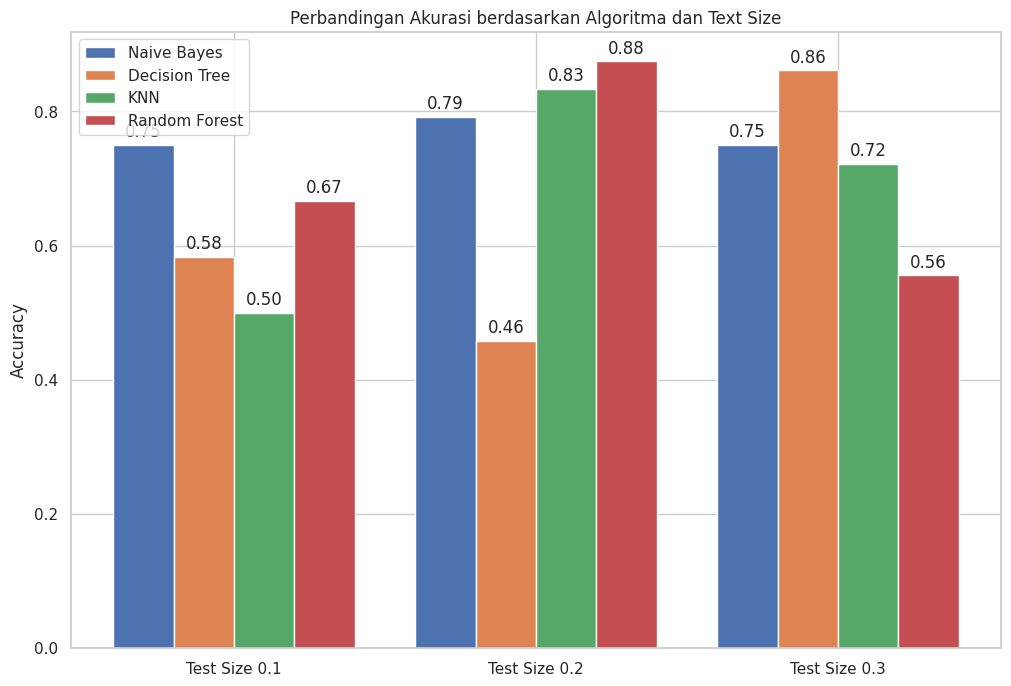

In [143]:
# Menyusun data untuk visualisasi
labels = [f'Test Size {size}' for size in test_sizes]
x = np.arange(len(labels))
width = 0.2

# Membuat bar chart
fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 1.5*width, accuracies_nb, width, label='Naive Bayes')
rects2 = ax.bar(x - 0.5*width, accuracies_dt, width, label='Decision Tree')
rects3 = ax.bar(x + 0.5*width, accuracies_knn, width, label='KNN')
rects4 = ax.bar(x + 1.5*width, accuracies_rf, width, label='Random Forest')

# Menambahkan label, judul, dan legenda
ax.set_ylabel('Accuracy')
ax.set_title('Perbandingan Akurasi berdasarkan Algoritma dan Text Size')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai akurasi di atas tiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Menampilkan grafik
plt.show()